<a href="https://colab.research.google.com/github/LightAxe/oregon-covid-visualizations/blob/main/oregon_covid_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Look at this:  https://github.com/briancpark/COVID-19-Visualizations/blob/master/COVID19%20Visualizations.ipynb

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
all_counties = pd.read_csv(url, dtype={"fips": str})
all_counties.date = pd.to_datetime(all_counties.date)

all_counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0


In [ ]:
def calc_daily_diff(county):
  dframe = county
  dframe['delta'] = county['cases'] - county['cases'].shift(1, fill_value=0)
  return dframe

In [ ]:
def get_state(state_name, df):
  state = df.loc[df['state'] == state_name]
  return state

In [ ]:
def get_oregon(all_counties):
  oregon = get_state('Oregon', all_counties)
  return oregon

In [ ]:
def get_county_pops():
  counties_url = 'http://rob.axpr.net/oregoncounties.csv'
  counties = pd.read_csv(counties_url, dtype={"CTYNAME": str})
  counties["CTYNAME"] = counties["CTYNAME"].str.split(" ", n = 1, expand = True) 
  counties.drop(labels="GrowthRate", axis=1, inplace=True)
  counties.rename(columns={"CTYNAME": "county", "pop2020": "population"}, errors="raise", inplace=True)
  return counties

In [ ]:
def get_county(county_name, df):
  county = df.loc[df['county'] == county_name]
  county = calc_daily_diff(county)
  county.drop(labels=['state','cases','deaths','fips'], axis=1, inplace=True)
  county['report_date'] = county['date']
  county.set_index('date', inplace=True)

  county_pops = get_county_pops()
  
  county = pd.merge(county, county_pops, on = 'county', how = 'left')
  return county

In [ ]:
def get_polk(oregon):
  polk = get_county('Polk', oregon)
  return polk

In [ ]:
def calc_cases_per_100k(county):
  county['rolling_14'] = county['delta'].rolling(min_periods=1, window=14).sum()
  county['rolling_14_per'] = county['rolling_14'] / county['population'] * 100000
  return county

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,county,delta,report_date,population,rolling_14,rolling_14_per,distance_learning,onsite_and_distance,transition
240,Polk,15,2020-11-06,88200,112.0,126.984127,200,50,100
241,Polk,11,2020-11-07,88200,118.0,133.786848,200,50,100
242,Polk,17,2020-11-08,88200,133.0,150.793651,200,50,100
243,Polk,17,2020-11-09,88200,146.0,165.532880,200,50,100
244,Polk,15,2020-11-10,88200,158.0,179.138322,200,50,100


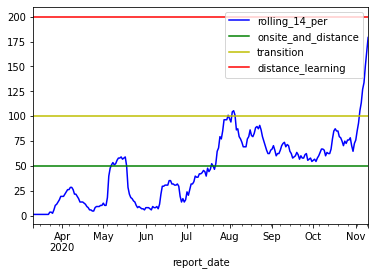

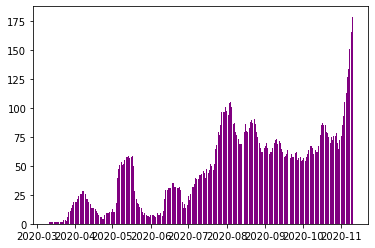

In [ ]:
oregon = get_state('Oregon', all_counties)

polk = get_county('Polk', oregon)

polk = calc_cases_per_100k(polk)
polk['distance_learning'] = 200
polk['onsite_and_distance'] = 50
polk['transition'] = 100

# What I want:  The rolling 14 day case count with background colors denoting the range
# Workaround:  Lines denoting the range changes
polk.plot(y = ['rolling_14_per','onsite_and_distance','transition','distance_learning'], color=['b','g','y','r'], x = 'report_date')

# Experimenting with not using plot()
fig, ax = plt.subplots()
ax.bar(polk['report_date'],
       polk['rolling_14_per'],
       color='purple')

polk.tail()

In [ ]:
#Playing around with getting all the counties in Oregon to display and calculate deltas

oregon = get_state('Oregon', all_counties)
oregon.head()
#dframe['delta'] = county['cases'] - county['cases'].shift(1, fill_value=0)
oregon.set_index('date', inplace=True)
oregon.sort_values('county', inplace=True)

# This is not working; I was hoping to find the differences from one day to another on a per-county basis
oregon['delta'] = oregon.groupby(['state','county'])['cases'].shift(1, fill_value=0)
oregon.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,county,state,fips,cases,deaths,delta
date,,,,,,
2020-07-18,Yamhill,Oregon,41071,229,9,222
2020-07-19,Yamhill,Oregon,41071,235,9,229
2020-07-20,Yamhill,Oregon,41071,241,9,235
2020-07-21,Yamhill,Oregon,41071,248,9,241
2020-11-10,Yamhill,Oregon,41071,1208,15,248
